In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def plot_adj(adj):
    
    plt.subplots(figsize = (12,12))
    sns.set(font_scale=0.5)
    sns.heatmap(adj, 
                cbar=True, 
                square=True,
                # annot=True, # 注入数字
                # fmt='.2f',   # 字符串格式代码
                annot_kws={'size': 6}, # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
                yticklabels=[i for i in range(0,62)],  # 列标签
                xticklabels=[i for i in range(0,62)],   # 行标签
                cmap = "Reds")
    plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
import torch
import scipy.io as scio


data_feature= torch.load("/home/wf/EEG_GTN/data/dataset/Processed_Dataset/seed/zero/de/data.pt")[0,0,0,:,:,0]
print(data_feature.shape)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_feature)
print(standardized_data)

data_origin = scio.loadmat('/home/wf/EEG_GTN/data/dataset/SEED/Preprocessed_EEG/1_1.mat')['djc_eeg1']

torch.Size([62, 265])
[[0.9592218  0.95886651 0.95814366 ... 0.         0.         0.        ]
 [0.69192932 0.68991667 0.68843013 ... 0.         0.         0.        ]
 [1.20832611 1.21070494 1.21217969 ... 0.         0.         0.        ]
 ...
 [0.61606171 0.61683098 0.61983681 ... 0.         0.         0.        ]
 [0.41682897 0.41750801 0.41854254 ... 0.         0.         0.        ]
 [0.44370091 0.44516146 0.44607085 ... 0.         0.         0.        ]]


In [3]:
from utils.adj_utils import *

adj_feature_pcc = cal_pcc_matrix(standardized_data)
adj_feature_coh = cal_coherence_matrix(standardized_data)
adj_feature_nmi = cal_nmi_matrix(standardized_data)
adj_feature_plv = cal_plv_matrix(standardized_data)


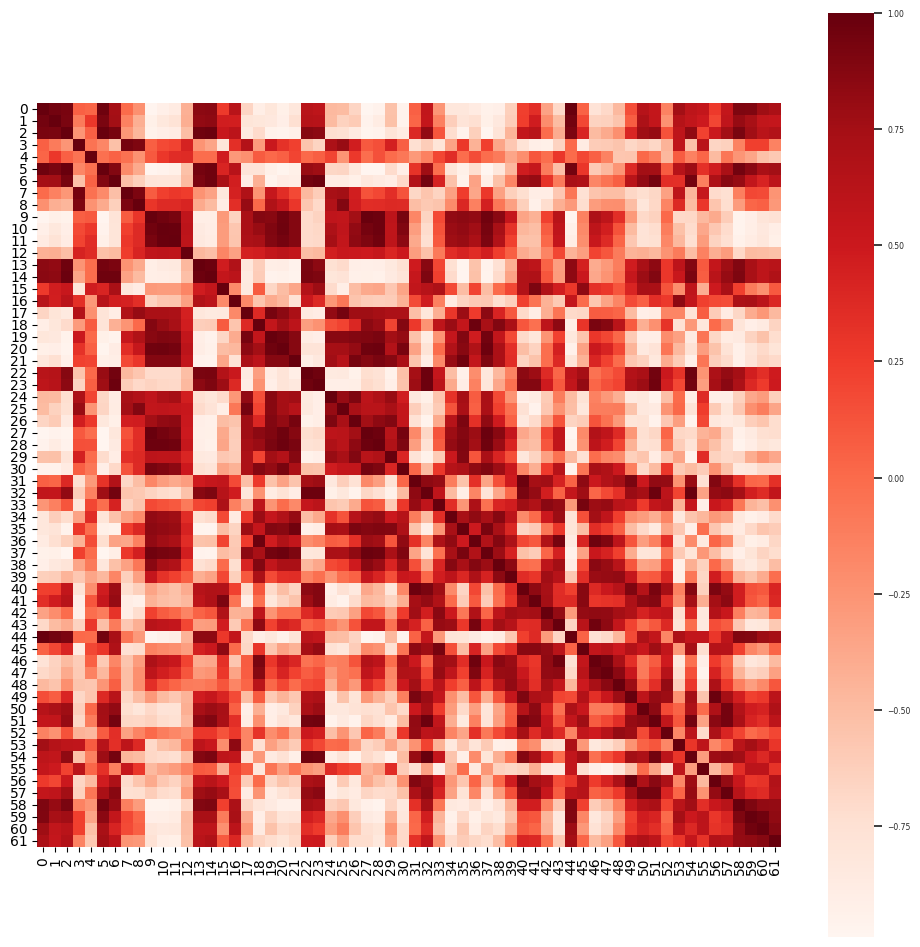

In [4]:
plot_adj(adj_feature_pcc)

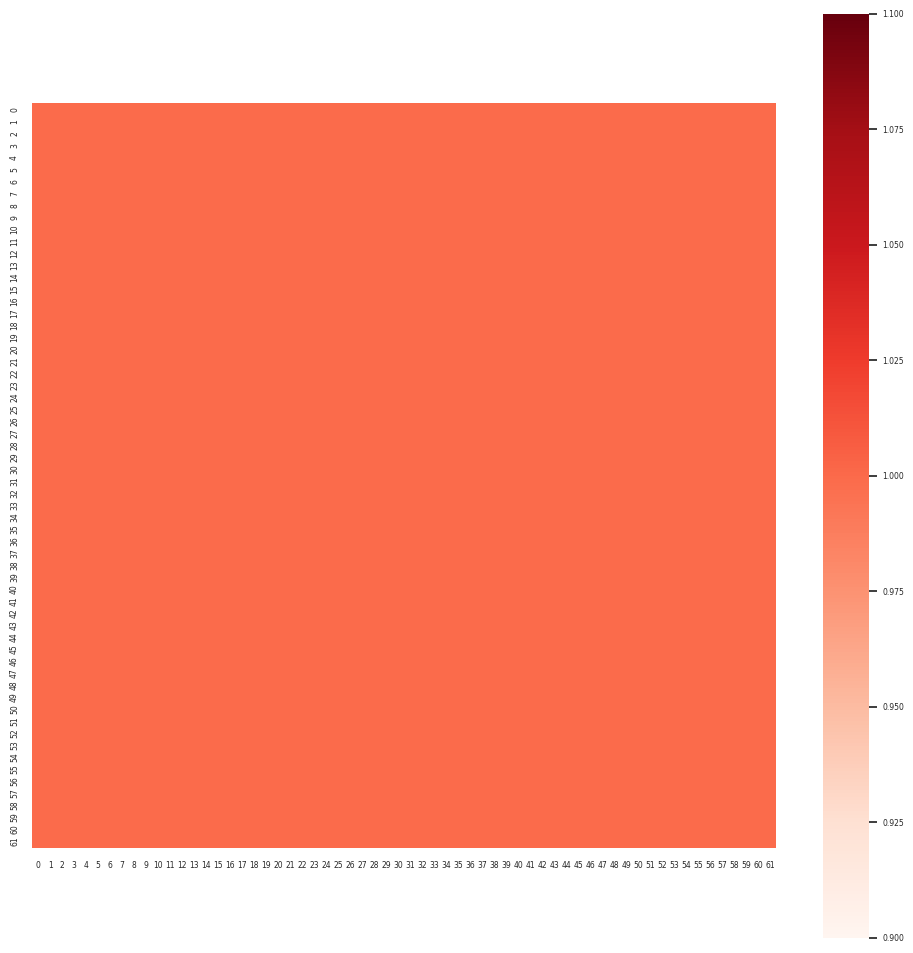

In [5]:
plot_adj(adj_feature_coh)

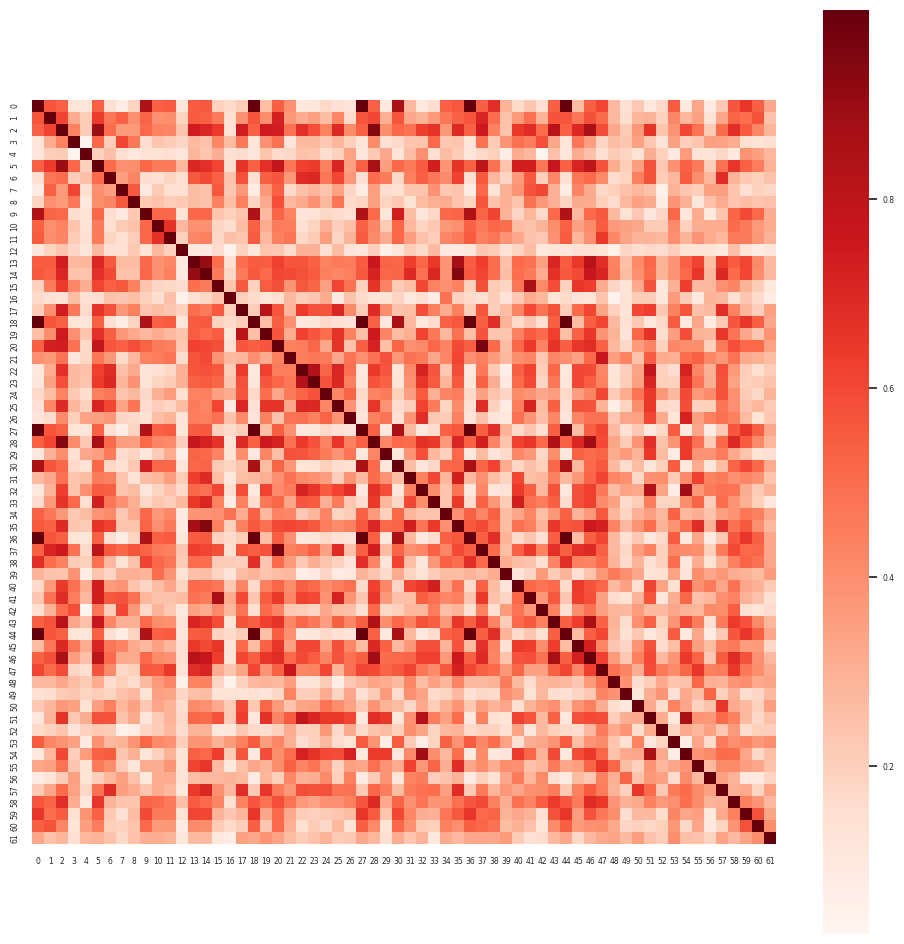

In [6]:
plot_adj(adj_feature_nmi)

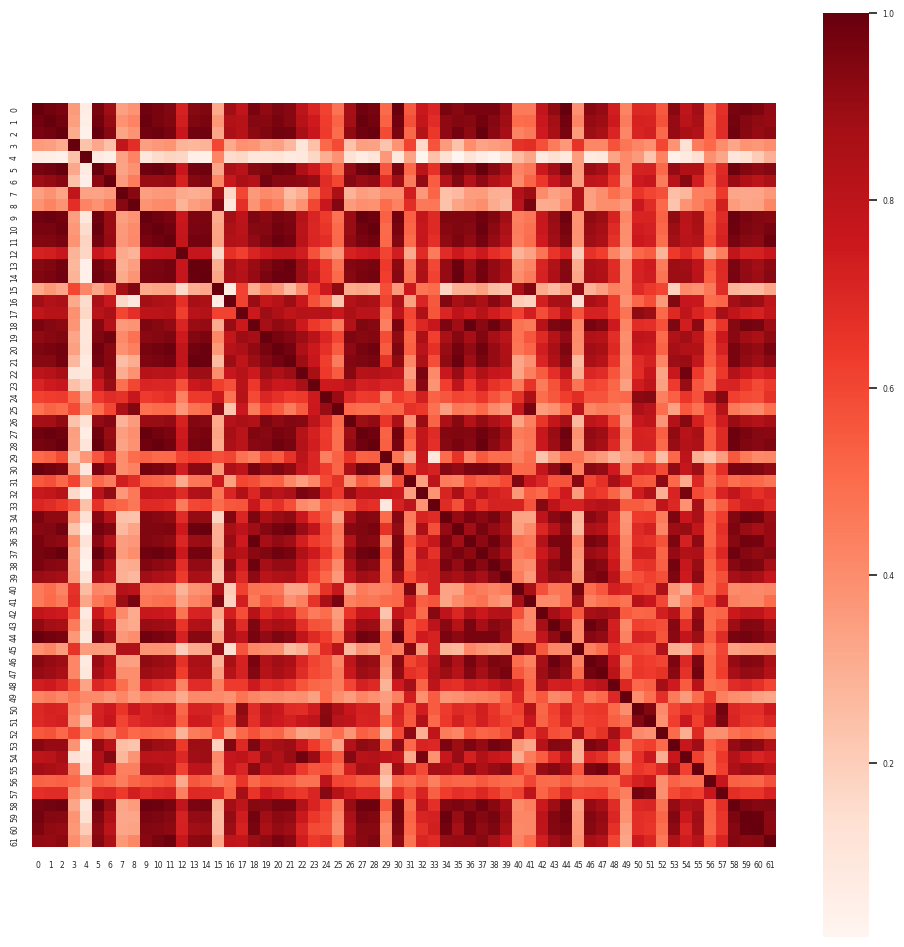

In [7]:
plot_adj(adj_feature_plv)

In [8]:
adj_raw_pcc = cal_pcc_matrix(data_origin)
adj_raw_coh = cal_coherence_matrix(data_origin)
adj_raw_nmi = cal_nmi_matrix(data_origin)
adj_raw_plv = cal_plv_matrix(data_origin)

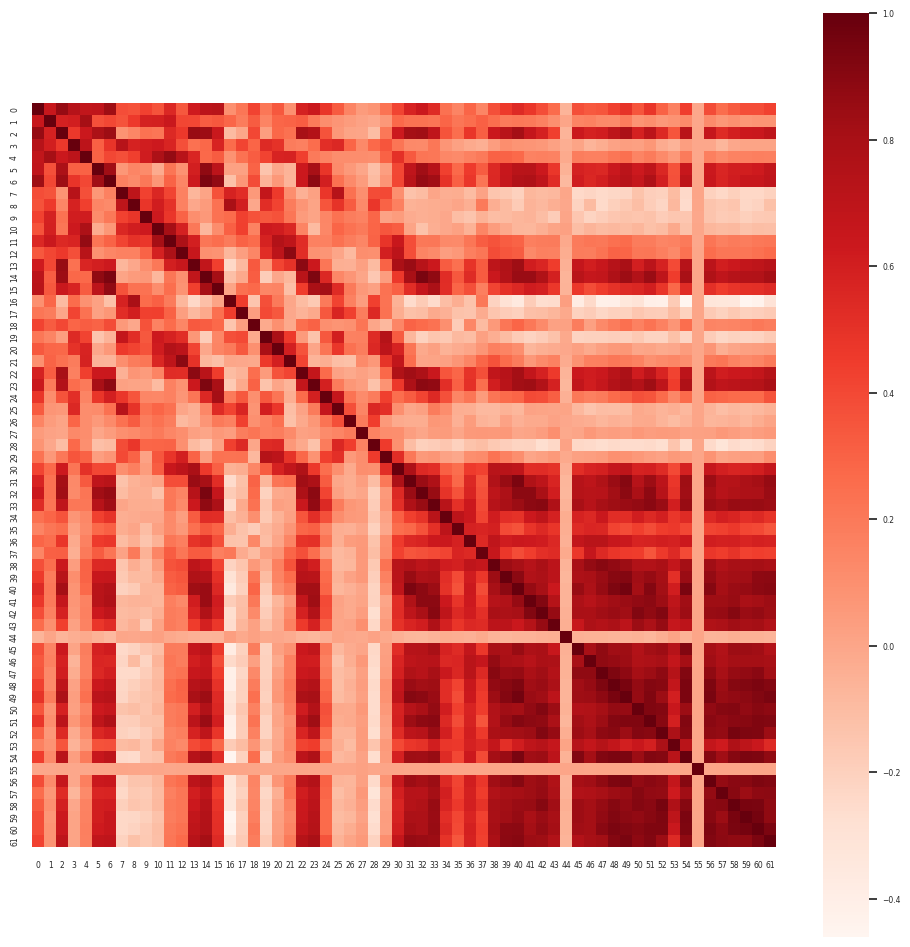

In [9]:
plot_adj(adj_raw_pcc)

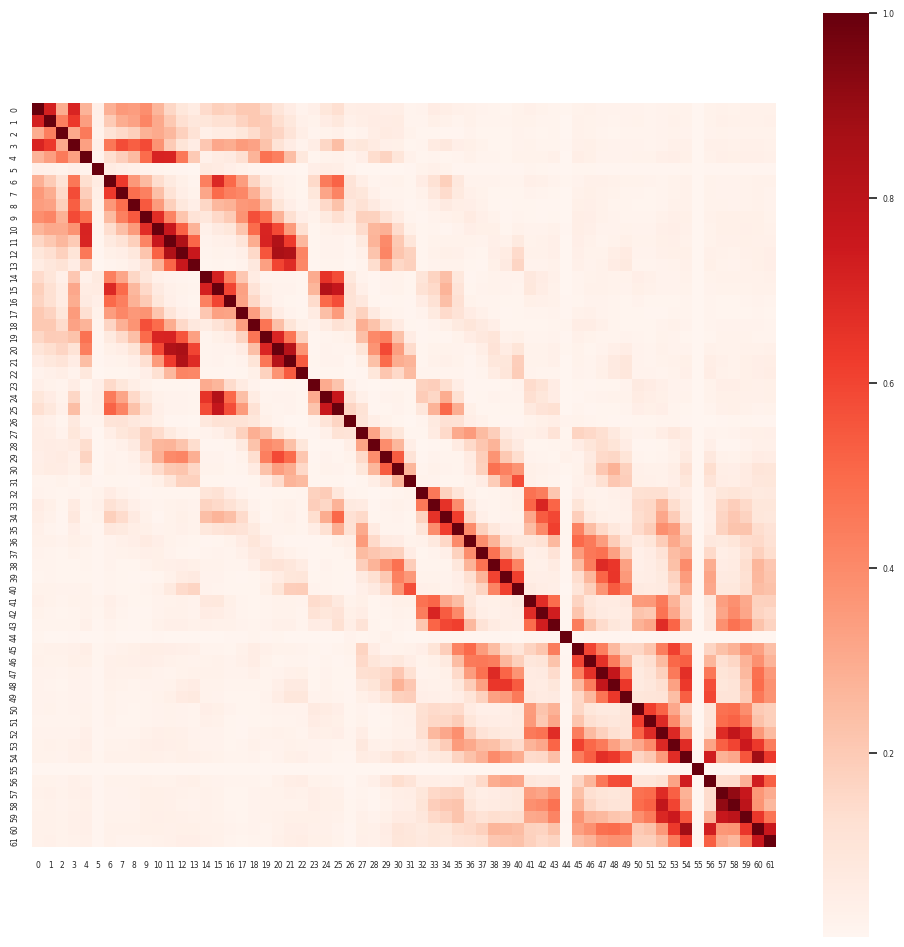

In [10]:
plot_adj(adj_raw_coh)

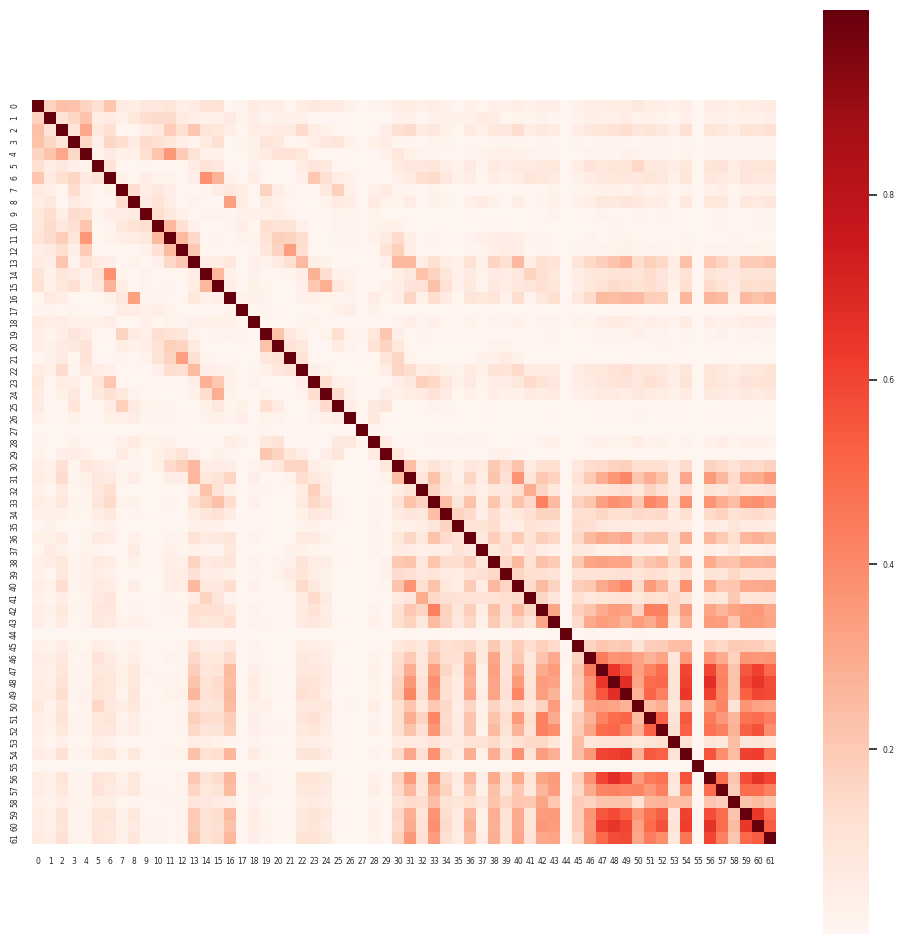

In [11]:
plot_adj(adj_raw_nmi)

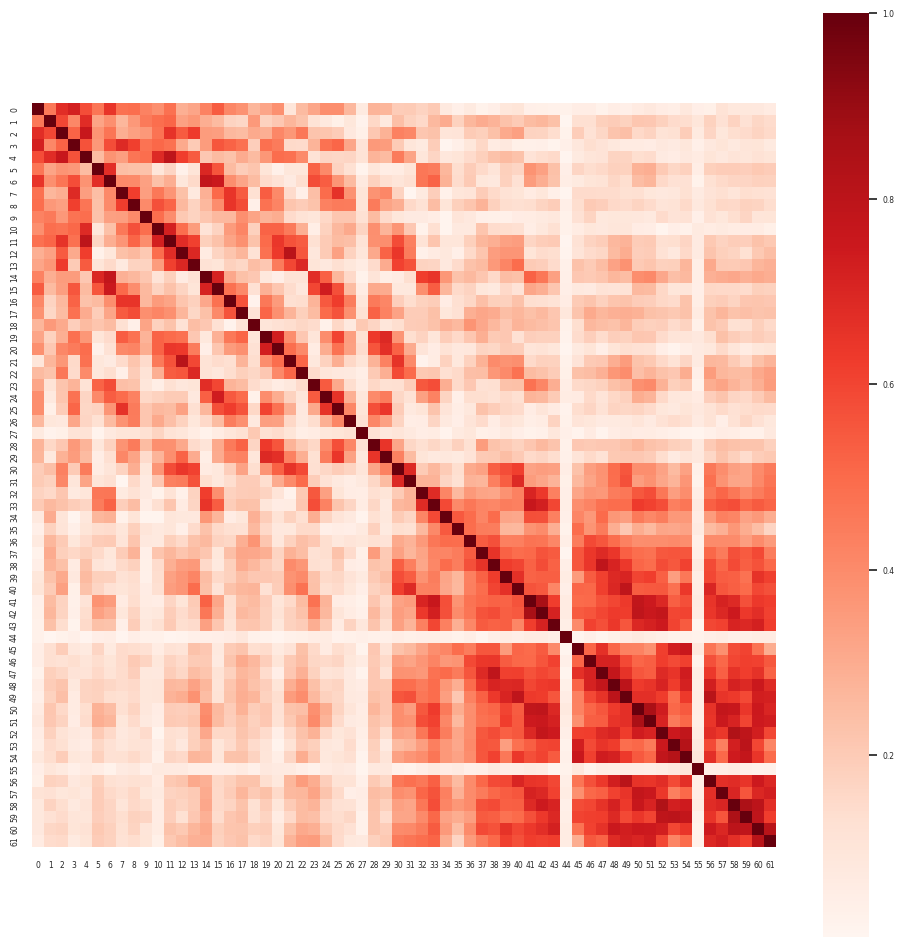

In [12]:
plot_adj(adj_raw_plv)

# 求出原始数据的邻接矩阵, 并与特征数据一起保存便于后续使用

In [ ]:
import scipy.io as scio
import os,re
from utils.adj_utils import *

def get_trail_keys(data_keys):
    s=str(data_keys)

    keys = re.findall(r"'(.*?)'", s)[3:]
    return keys
all_pcc_adj = torch.zeros((15,3,15,62,62))
all_nmi_adj = torch.zeros((15,3,15,62,62))
all_coh_adj = torch.zeros((15,3,15,62,62))
all_plv_adj = torch.zeros((15,3,15,62,62))
for subject in range(15):
    for session in range(3):
        data = scio.loadmat(os.path.join("/home/wf/EEG_GTN/data/dataset/SEED/Preprocessed_EEG",f"{subject+1}_{session+1}.mat"))
        keys = get_trail_keys(data.keys())
        for exp in range(15):
            data_one_exp = data[keys[exp]]
            all_pcc_adj[subject,session,exp] = torch.from_numpy(cal_pcc_matrix(data_one_exp))
            all_nmi_adj[subject,session,exp] = torch.from_numpy(cal_nmi_matrix(data_one_exp))
            all_coh_adj[subject,session,exp] = torch.from_numpy(cal_coherence_matrix(data_one_exp))
            all_plv_adj[subject,session,exp] = torch.from_numpy(cal_plv_matrix(data_one_exp))
            print(f"subject: {subject+1}, session: {session+1}, exp: {exp+1}","is done.")

torch.save(all_pcc_adj,"/home/wf/EEG_GTN/data/dataset/SEED/adjacency_matrix/all_pcc_adj.pt")
torch.save(all_nmi_adj,"/home/wf/EEG_GTN/data/dataset/SEED/adjacency_matrix/all_nmi_adj.pt")
torch.save(all_coh_adj,"/home/wf/EEG_GTN/data/dataset/SEED/adjacency_matrix/all_coh_adj.pt")
torch.save(all_plv_adj,"/home/wf/EEG_GTN/data/dataset/SEED/adjacency_matrix/all_plv_adj.pt")
